In [1]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os, sys, numpy as np
import argparse
from time import time
from tqdm import tqdm
import tensorflow 
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision.transforms as transforms
from PIL import Image
import keras
from keras.layers import TimeDistributed as td
from keras.layers import Conv2D, Flatten, Dense, ZeroPadding2D, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization, Reshape
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps
import random

In [21]:
dirlist=os.listdir('/content/drive/MyDrive/cv/To_blur')
for image in dirlist:
  img=cv2.imread('/content/drive/MyDrive/cv/To_blur/'+image)
  size = (300,300)
  img2 = cv2.resize(img, size)
  blur = cv2.GaussianBlur(img2,(5,5),0)
  cv2.imwrite('/content/drive/MyDrive/cv/small_blur/'+image,blur)

In [22]:
dirlist=os.listdir('/content/drive/MyDrive/cv/small_blur')
xim=[]
yim=[]
original=[]
for image in dirlist:
  small=cv2.imread('/content/drive/MyDrive/cv/small_blur/'+image)
  original.append(small)
  one=small[:100,:100,:]
  two=small[:100,100:200,:]
  three=small[:100,200:300,:]
  four=small[100:200,:100,:]
  five=small[100:200,100:200,:]
  six=small[100:200,200:300,:]
  seven=small[200:300,:100,:]
  eight=small[200:300,100:200,:]
  nine=small[200:300,200:300,:]
  x=[]
  y=[1,2,3,4,5,6,7,8,9]
  random.shuffle(y)
  for i in range(9):
    if (y[i]==1):
      x.append(one)
    if (y[i]==2):
      x.append(two)
    if (y[i]==3):
      x.append(three)
    if (y[i]==4):
      x.append(four)
    if (y[i]==5):
      x.append(five)
    if (y[i]==6):
      x.append(six)
    if (y[i]==7):
      x.append(seven)
    if (y[i]==8):
      x.append(eight)
    if (y[i]==9):
      x.append(nine)
  xar=np.array(x)
  yar=np.array(y)
  xim.append(xar)
  yim.append(yar)
og=np.array(original)
xfin=np.array(xim)
yfin=np.array(yim)

In [23]:
print(xfin.shape)
print(yfin.shape)
print(og.shape)
trainor=og[:800,:,:,:]
valor=og[800:900,:,:,:]
testor=og[900:1000,:,:,:]
Xtrain=xfin[:800,:,:,:,:]
Ytrain=yfin[:800,:]
Xval=xfin[800:900,:,:,:,:]
Yval=yfin[800:900,:]
Xtest=xfin[900:1000,:,:,:,:]
Ytest=yfin[900:1000,:]

(1000, 9, 100, 100, 3)
(1000, 9)
(1000, 300, 300, 3)


In [24]:
print(Xval.shape)

(100, 9, 100, 100, 3)


In [25]:
model = keras.models.Sequential()
model.add(td(ZeroPadding2D(2), input_shape=(9, 100, 100, 3)))
model.add(td(Conv2D(50, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(MaxPooling2D()))
model.add(td(Conv2D(100, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(td(Conv2D(100, kernel_size=(3,3), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(td(Conv2D(200, kernel_size=(3,3), padding='same', activation='relu', strides=1)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(9))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 9, 104, 104, 3)   0         
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 9, 52, 52, 50)    3800      
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 9, 52, 52, 50)    200       
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 9, 26, 26, 50)    0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 9, 13, 13, 100)  

In [26]:
model.compile(loss='MeanSquaredError', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [27]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [28]:
history= model.fit(Xtrain, Ytrain, epochs=800, batch_size=10, verbose=1,validation_data=(Xval,Yval),callbacks=[callback])


Epoch 1/800
80/80 [==============================] - 5s 44ms/step - loss: 30.3783 - accuracy: 0.1925 - val_loss: 30.5945 - val_accuracy: 0.0900
Epoch 2/800
80/80 [==============================] - 3s 31ms/step - loss: 30.2797 - accuracy: 0.2288 - val_loss: 30.6107 - val_accuracy: 0.0900
Epoch 3/800
80/80 [==============================] - 3s 32ms/step - loss: 30.2684 - accuracy: 0.2275 - val_loss: 30.3086 - val_accuracy: 0.2100
Epoch 4/800
80/80 [==============================] - 3s 32ms/step - loss: 30.2165 - accuracy: 0.2713 - val_loss: 30.2183 - val_accuracy: 0.3300
Epoch 5/800
80/80 [==============================] - 2s 31ms/step - loss: 30.2079 - accuracy: 0.2750 - val_loss: 30.2451 - val_accuracy: 0.2800
Epoch 6/800
80/80 [==============================] - 3s 33ms/step - loss: 30.2236 - accuracy: 0.3000 - val_loss: 30.2519 - val_accuracy: 0.2400
Epoch 7/800
80/80 [==============================] - 3s 33ms/step - loss: 30.1693 - accuracy: 0.3063 - val_loss: 30.2838 - val_accuracy:

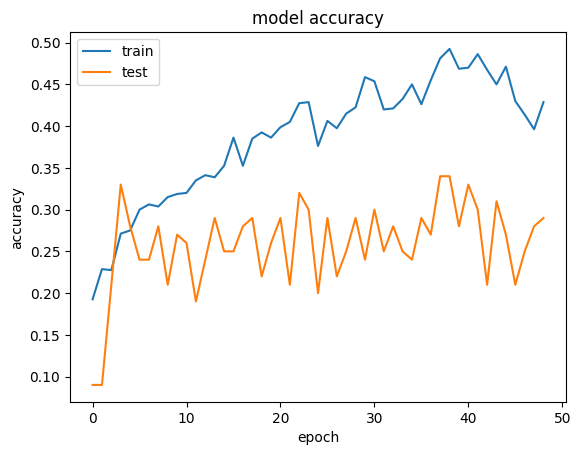

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
_, accuracy = model.evaluate(Xtest, Ytest)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 1s 39ms/step - loss: 30.2411 - accuracy: 0.3300
Accuracy: 33.00


(100, 9, 100, 100, 3)
(1, 9, 100, 100, 3)
[1, 4, 3, 5, 2, 8, 9, 7, 6]
[4, 9, 1, 5, 8, 3, 6, 2, 7]
Solved:


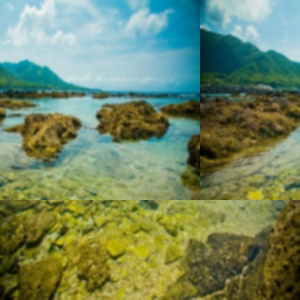

Original:


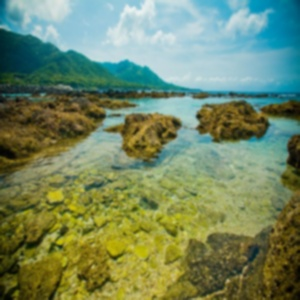

Shuffled


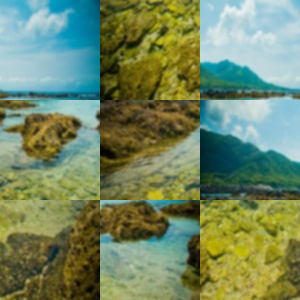

In [45]:
print(Xtest.shape)
X1=[Xtest[76,:,:,:,:]]
Xa=np.array(X1)
print(Xa.shape)
ytesting=model.predict(Xa)
sort_index = np.argsort(ytesting)
List = sort_index[0]
predicted=[]
Actual=[]
for elem in List:
  predicted.append(elem+1)
for elem in Ytest[0]:
  Actual.append(elem)
print(predicted)
print(Actual)
print('Solved:')
pre=np.zeros((300,300,3))
pre[:100,:100,:]=X1[0][predicted[0]-1]
pre[:100,100:200,:]=X1[0][predicted[1]-1]
pre[:100,200:300,:]=X1[0][predicted[2]-1]
pre[100:200,:100,:]=X1[0][predicted[3]-1]
pre[100:200,100:200,:]=X1[0][predicted[4]-1]
pre[100:200,200:300,:]=X1[0][predicted[5]-1]
pre[200:300,:100,:]=X1[0][predicted[6]-1]
pre[200:300,100:200,:]=X1[0][predicted[7]-1]
pre[200:300,200:300,:]=X1[0][predicted[8]-1]
cv2_imshow(pre)
print('Original:')
cv2_imshow(testor[76])
print('Shuffled')
shu=np.zeros((300,300,3))
shu[:100,:100,:]=X1[0][Actual[0]-1]
shu[:100,100:200,:]=X1[0][Actual[1]-1]
shu[:100,200:300,:]=X1[0][Actual[2]-1]
shu[100:200,:100,:]=X1[0][Actual[3]-1]
shu[100:200,100:200,:]=X1[0][Actual[4]-1]
shu[100:200,200:300,:]=X1[0][Actual[5]-1]
shu[200:300,:100,:]=X1[0][Actual[6]-1]
shu[200:300,100:200,:]=X1[0][Actual[7]-1]
shu[200:300,200:300,:]=X1[0][Actual[8]-1]
cv2_imshow(shu)

(100, 9, 100, 100, 3)
(1, 9, 100, 100, 3)
[5, 1, 4, 3, 8, 9, 2, 6, 7]
[4, 9, 1, 5, 8, 3, 6, 2, 7]
Solved:


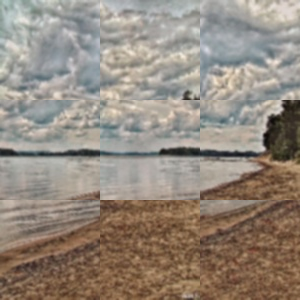

Original:


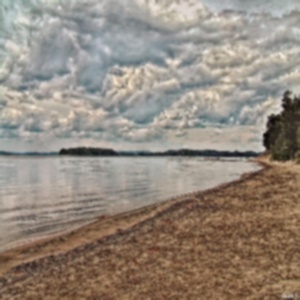

Shuffled


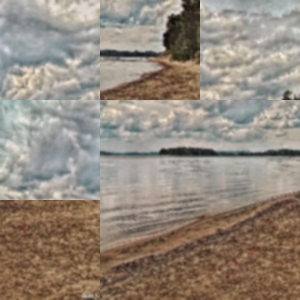

In [46]:
print(Xtest.shape)
X1=[Xtest[90,:,:,:,:]]
Xa=np.array(X1)
print(Xa.shape)
ytesting=model.predict(Xa)
sort_index = np.argsort(ytesting)
List = sort_index[0]
predicted=[]
Actual=[]
for elem in List:
  predicted.append(elem+1)
for elem in Ytest[0]:
  Actual.append(elem)
print(predicted)
print(Actual)
print('Solved:')
pre=np.zeros((300,300,3))
pre[:100,:100,:]=X1[0][predicted[0]-1]
pre[:100,100:200,:]=X1[0][predicted[1]-1]
pre[:100,200:300,:]=X1[0][predicted[2]-1]
pre[100:200,:100,:]=X1[0][predicted[3]-1]
pre[100:200,100:200,:]=X1[0][predicted[4]-1]
pre[100:200,200:300,:]=X1[0][predicted[5]-1]
pre[200:300,:100,:]=X1[0][predicted[6]-1]
pre[200:300,100:200,:]=X1[0][predicted[7]-1]
pre[200:300,200:300,:]=X1[0][predicted[8]-1]
cv2_imshow(pre)
print('Original:')
cv2_imshow(testor[90])
print('Shuffled')
shu=np.zeros((300,300,3))
shu[:100,:100,:]=X1[0][Actual[0]-1]
shu[:100,100:200,:]=X1[0][Actual[1]-1]
shu[:100,200:300,:]=X1[0][Actual[2]-1]
shu[100:200,:100,:]=X1[0][Actual[3]-1]
shu[100:200,100:200,:]=X1[0][Actual[4]-1]
shu[100:200,200:300,:]=X1[0][Actual[5]-1]
shu[200:300,:100,:]=X1[0][Actual[6]-1]
shu[200:300,100:200,:]=X1[0][Actual[7]-1]
shu[200:300,200:300,:]=X1[0][Actual[8]-1]
cv2_imshow(shu)

(100, 9, 100, 100, 3)
(1, 9, 100, 100, 3)
[7, 6, 3, 9, 4, 2, 8, 5, 1]
[4, 9, 1, 5, 8, 3, 6, 2, 7]
Solved:


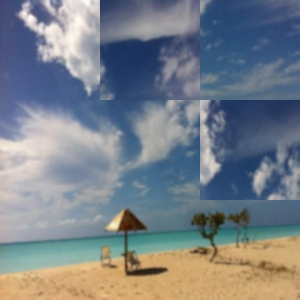

Original:


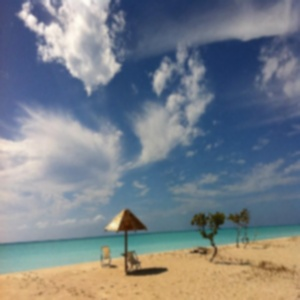

Shuffled


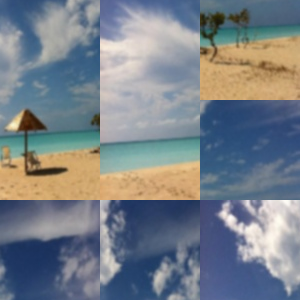

In [47]:
print(Xtest.shape)
X1=[Xtest[72,:,:,:,:]]
Xa=np.array(X1)
print(Xa.shape)
ytesting=model.predict(Xa)
sort_index = np.argsort(ytesting)
List = sort_index[0]
predicted=[]
Actual=[]
for elem in List:
  predicted.append(elem+1)
for elem in Ytest[0]:
  Actual.append(elem)
print(predicted)
print(Actual)
print('Solved:')
pre=np.zeros((300,300,3))
pre[:100,:100,:]=X1[0][predicted[0]-1]
pre[:100,100:200,:]=X1[0][predicted[1]-1]
pre[:100,200:300,:]=X1[0][predicted[2]-1]
pre[100:200,:100,:]=X1[0][predicted[3]-1]
pre[100:200,100:200,:]=X1[0][predicted[4]-1]
pre[100:200,200:300,:]=X1[0][predicted[5]-1]
pre[200:300,:100,:]=X1[0][predicted[6]-1]
pre[200:300,100:200,:]=X1[0][predicted[7]-1]
pre[200:300,200:300,:]=X1[0][predicted[8]-1]
cv2_imshow(pre)
print('Original:')
cv2_imshow(testor[72])
print('Shuffled')
shu=np.zeros((300,300,3))
shu[:100,:100,:]=X1[0][Actual[0]-1]
shu[:100,100:200,:]=X1[0][Actual[1]-1]
shu[:100,200:300,:]=X1[0][Actual[2]-1]
shu[100:200,:100,:]=X1[0][Actual[3]-1]
shu[100:200,100:200,:]=X1[0][Actual[4]-1]
shu[100:200,200:300,:]=X1[0][Actual[5]-1]
shu[200:300,:100,:]=X1[0][Actual[6]-1]
shu[200:300,100:200,:]=X1[0][Actual[7]-1]
shu[200:300,200:300,:]=X1[0][Actual[8]-1]
cv2_imshow(shu)